<a href="https://colab.research.google.com/github/AkshayJaitly/Udacity_DataScience/blob/master/BostonAirBnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Looking into Boston AirBnb dataset
The dataset is available at https://www.kaggle.com/airbnb/boston

There are 3 files in the dataset:

1.calendar.csv

2.listings.csv

3.reviews.csv

I have followed the CrispDm principles.


1.   Business Understanding

      *   Most common price listings for AirBnb?
      *   What is the relation between price and property type?
      *    Which room types in each neighbourhood have high   prices?
      *   What are the top 5 amenities?




2.   Data Understanding

3.   Data Preparation

4.   Modeling 

5. Evaluation

6. Deployment




# Understanding listings.csv better 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Importing data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer 
%matplotlib inline


listing_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/boston/listings.csv')
calendar_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/boston/calendar.csv')
reviews_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/boston/reviews.csv')
calendar_df.info()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [0]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [0]:
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1

The dataset here has 95 columns. We need to understand the columns better. I will list down the columns to understand better.

In [0]:
listing_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [0]:
listing_df.tail()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,NaN,NaN,NaN,NaN,1. No damage to the house or furniture 2. No S...,https://a2.muscache.com/im/pictures/809e828a-c...,https://a2.muscache.com/im/pictures/809e828a-c...,https://a2.muscache.com/im/pictures/809e828a-c...,https://a2.muscache.com/im/pictures/809e828a-c...,19246369,https://www.airbnb.com/users/show/19246369,Joe,2014-07-31,"Somerville, Massachusetts, United States",NaN,within an hour,96%,100%,f,https://a2.muscache.com/im/users/19246369/prof...,https://a2.muscache.com/im/users/19246369/prof...,Somerville,28,28,"['email', 'phone', 'reviews', 'jumio']",t,t,"Washington Street, Somerville, MA 02143, Unite...",Somerville,Charlestown,...,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,$69.00,NaN,NaN,$95.00,NaN,1,$24.00,2,1125,5 days ago,NaN,21,51,81,356,2016-09-06,4,2015-09-18,2016-08-27,90.0,10.0,10.0,10.0,10.0,8.0,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,NaN,"There is green line, BU shuttle in front of th...",NaN,NaN,NaN,https://a2.muscache.com/im/pictures/e833ccdc-6...,https://a2.muscache.com/im/pictures/e833ccdc-6...,https://a2.muscache.com/im/pictures/e833ccdc-6...,https://a2.muscache.com/im/pictures/e833ccdc-6...,37366454,https://www.airbnb.com/users/show/37366454,Ivy,2015-07-02,US,this is Ivy,a few days or more,10%,83%,f,https://a2.muscache.com/im/pictures/685b7a0d-8...,https://a2.muscache.com/im/pictures/685b7a0d-8...,NaN,2,2,"['email', 'phone', 'reviews', 'weibo', 'jumio']",t,t,"Freeman Street, Brookline, MA 02446, United St...",NaN,Allston,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$150.00,NaN,NaN,$100.00,$15.00,1,$0.00,3,365,never,NaN,29,59,89,364,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...","Depending on when you arrive, I can be here to...","Public transport is 5 minuts away, but walking...",The whole place including social areas is your...,NaN,NaN,https://a2.muscache.com/im/pictures/eb32a608-a...,https://a2.muscache.com/im/pictures/eb32a608-a...,h

In [0]:
listing_df['host_location'].value_counts()

Boston, Massachusetts, United States                2421
US                                                   521
New York, New York, United States                    113
Montreal, Quebec, Canada                              59
Middlesex County, Massachusetts, United States        50
                                                    ... 
Sydney, New South Wales, Australia                     1
New Delhi, Delhi, India                                1
Hillsborough Township, New Jersey, United States       1
Cornellà de Llobregat, Catalunya, Spain                1
Chatham, Massachusetts, United States                  1
Name: host_location, Length: 176, dtype: int64

# List the counts of each city

In [0]:
listing_df['city'].value_counts()

Boston                       3381
Roxbury Crossing               24
Somerville                     19
Brookline                      18
Jamaica Plain                  18
Cambridge                      16
Brighton                       15
Charlestown                    15
Dorchester                     15
Allston                        12
Roslindale                      6
West Roxbury                    5
ROXBURY CROSSING                4
East Boston                     3
Mattapan                        3
South Boston                    2
Jamaica Plain                   2
ALLSTON                         2
Jamaica Plain, Boston           2
Boston, Massachusetts, US       2
Hyde Park                       2
Brighton                        1
Boston (Charlestown)            1
Boston                          1
boston                          1
Watertown                       1
Newton                          1
Jamaica Plain, MA               1
Mission Hill, Boston            1
east Boston   

In [0]:
listing_df['amenities'].value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                  32
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heating,Washer,Dryer,"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                                                                                                       15
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heating,Washer,Dryer,"Smoke Detector","Fire Extinguisher","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                        

In [0]:
listing_df['neighbourhood_group_cleansed'].tail()

3580   NaN
3581   NaN
3582   NaN
3583   NaN
3584   NaN
Name: neighbourhood_group_cleansed, dtype: float64

We can use the listings.csv to compute neigbourhood data which can be used for further analysis

In [0]:
neighbourhood_cols = ['id', 'property_type', 'room_type', 'neighbourhood', 
                      'neighbourhood_cleansed','zipcode', 'price']

neighbourhood_listings = listing_df[neighbourhood_cols]
neighbourhood_listings.tail()

,id,property_type,room_type,neighbourhood,neighbourhood_cleansed,zipcode,price
3580,8373729,Apartment,Private room,Somerville,Charlestown,02143,$69.00
3581,14844274,Apartment,Private room,NaN,Allston,02446,$150.00
3582,14585486,Apartment,Entire home/apt,NaN,Charlestown,02141,$198.00
3583,14603878,Apartment,Private room,Somerville,Charlestown,02145,$65.00
3584,14504422,Apartment,Private room,Somerville,Charlestown,02145,$65.00


In [0]:
neighbourhood_listings.head()


,id,property_type,room_type,neighbourhood,neighbourhood_cleansed,zipcode,price
0,12147973,House,Entire home/apt,Roslindale,Roslindale,02131,$250.00
1,3075044,Apartment,Private room,Roslindale,Roslindale,02131,$65.00
2,6976,Apartment,Private room,Roslindale,Roslindale,02131,$65.00
3,1436513,House,Private room,NaN,Roslindale,NaN,$75.00
4,7651065,House,Private room,Roslindale,Roslindale,02131,$79.00


# Q1. Most common price listings for AirBnb? 

Data Cleaning

In [0]:
listing_df['price'] = listing_df['price'].apply(lambda x: x.replace('$','').replace(',', '').replace('.00', '')).astype(np.float64)
listing_df['price'].head()

0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64

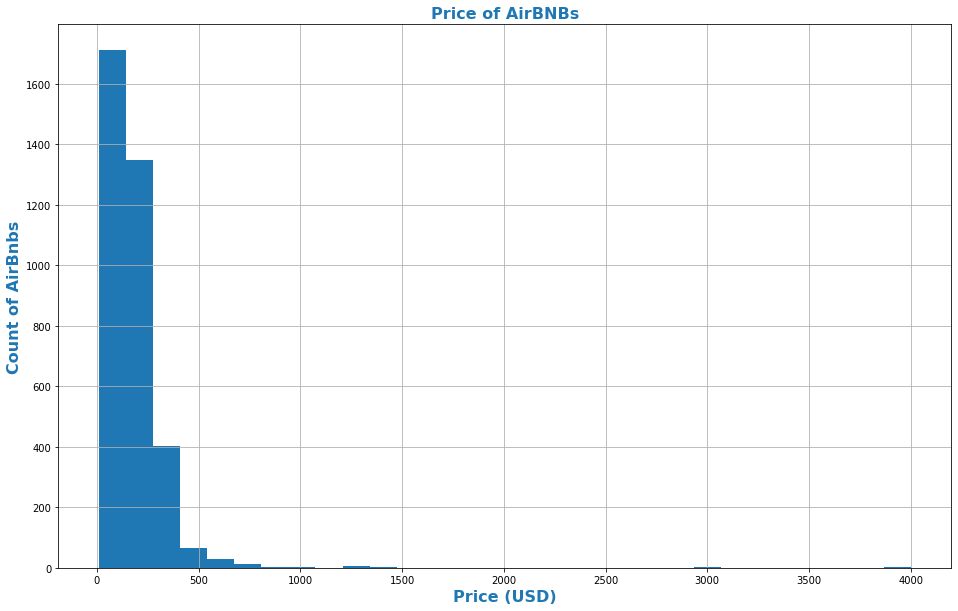

In [0]:
plt.figure(figsize=(16, 10));
listing_df['price'].hist(bins = 30);
plt.title('Price of AirBNBs', size = 16, weight = 'bold', color='C0');
plt.ylabel('Count of AirBnbs', weight = 'bold', size = 16, color='C0');
plt.xlabel('Price (USD)', weight = 'bold', size= 16, color='C0');

# The following histogram shows that there are only few listings above 700 dollars with the highest being 4000 dollars.

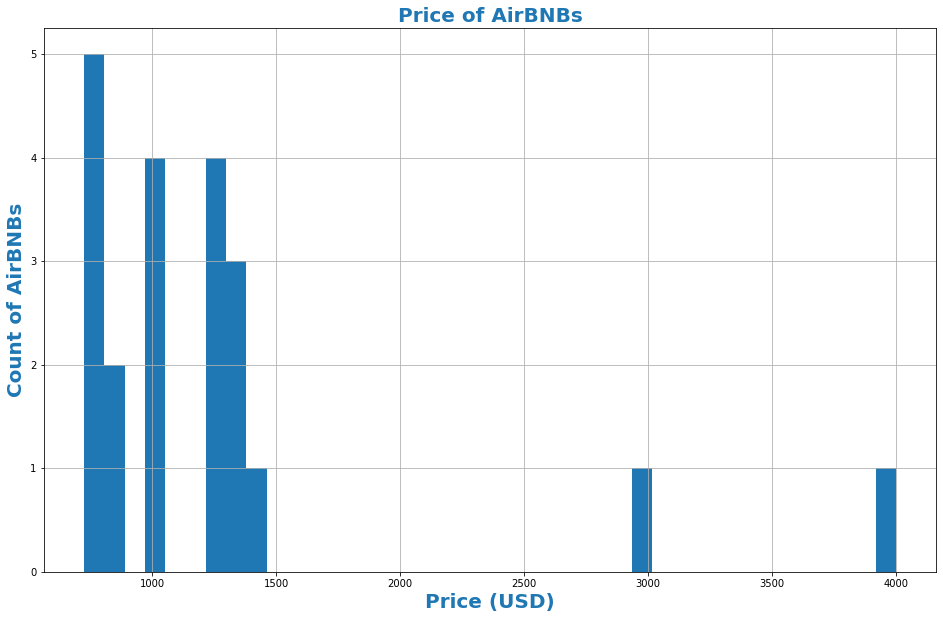

In [0]:
plt.figure(figsize=(16, 10));
listing_df[listing_df['price'] > 700]['price'].hist(bins=40);
plt.title('Price of AirBNBs', size = 20, weight = 'bold', color='C0');
plt.ylabel('Count of AirBNBs', weight = 'bold',size = 20, color='C0');
plt.xlabel('Price (USD)', weight = 'bold', size = 20,  color='C0');

# The following breakdown indicates that more airbnbs are on the lower end of the price range below 700 dollars. 

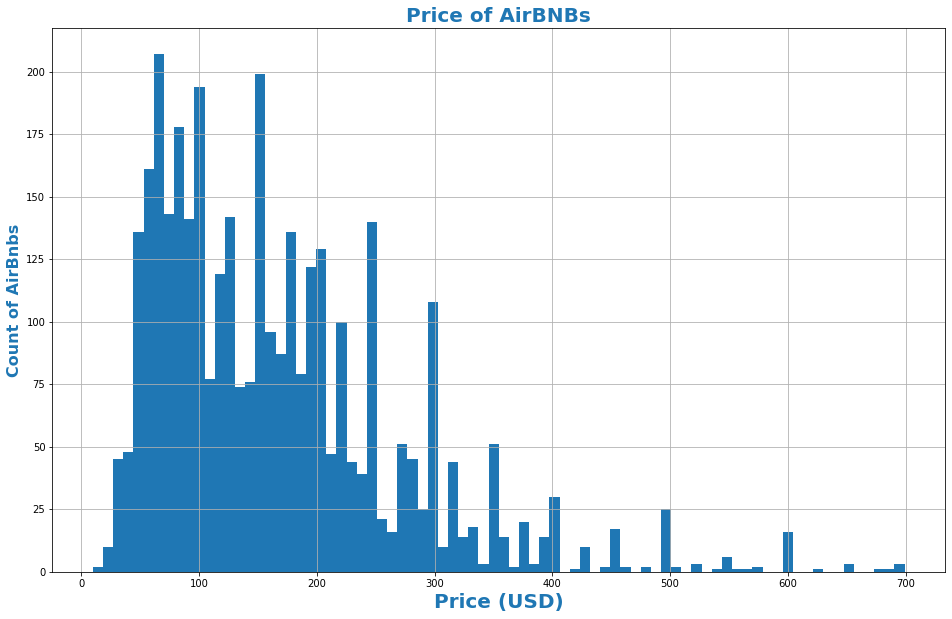

In [0]:
plt.figure(figsize=(16, 10));
listing_df[listing_df['price'] < 700]['price'].hist(bins=80);
plt.title('Price of AirBNBs', size = 20, weight = 'bold',  color='C0');
plt.ylabel('Count of AirBnbs', size =16, weight = 'bold', color='C0');
plt.xlabel('Price (USD)', size = 20,  weight = 'bold', color='C0');

In [0]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [0]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


# Q2. What is the relation between price and property type?

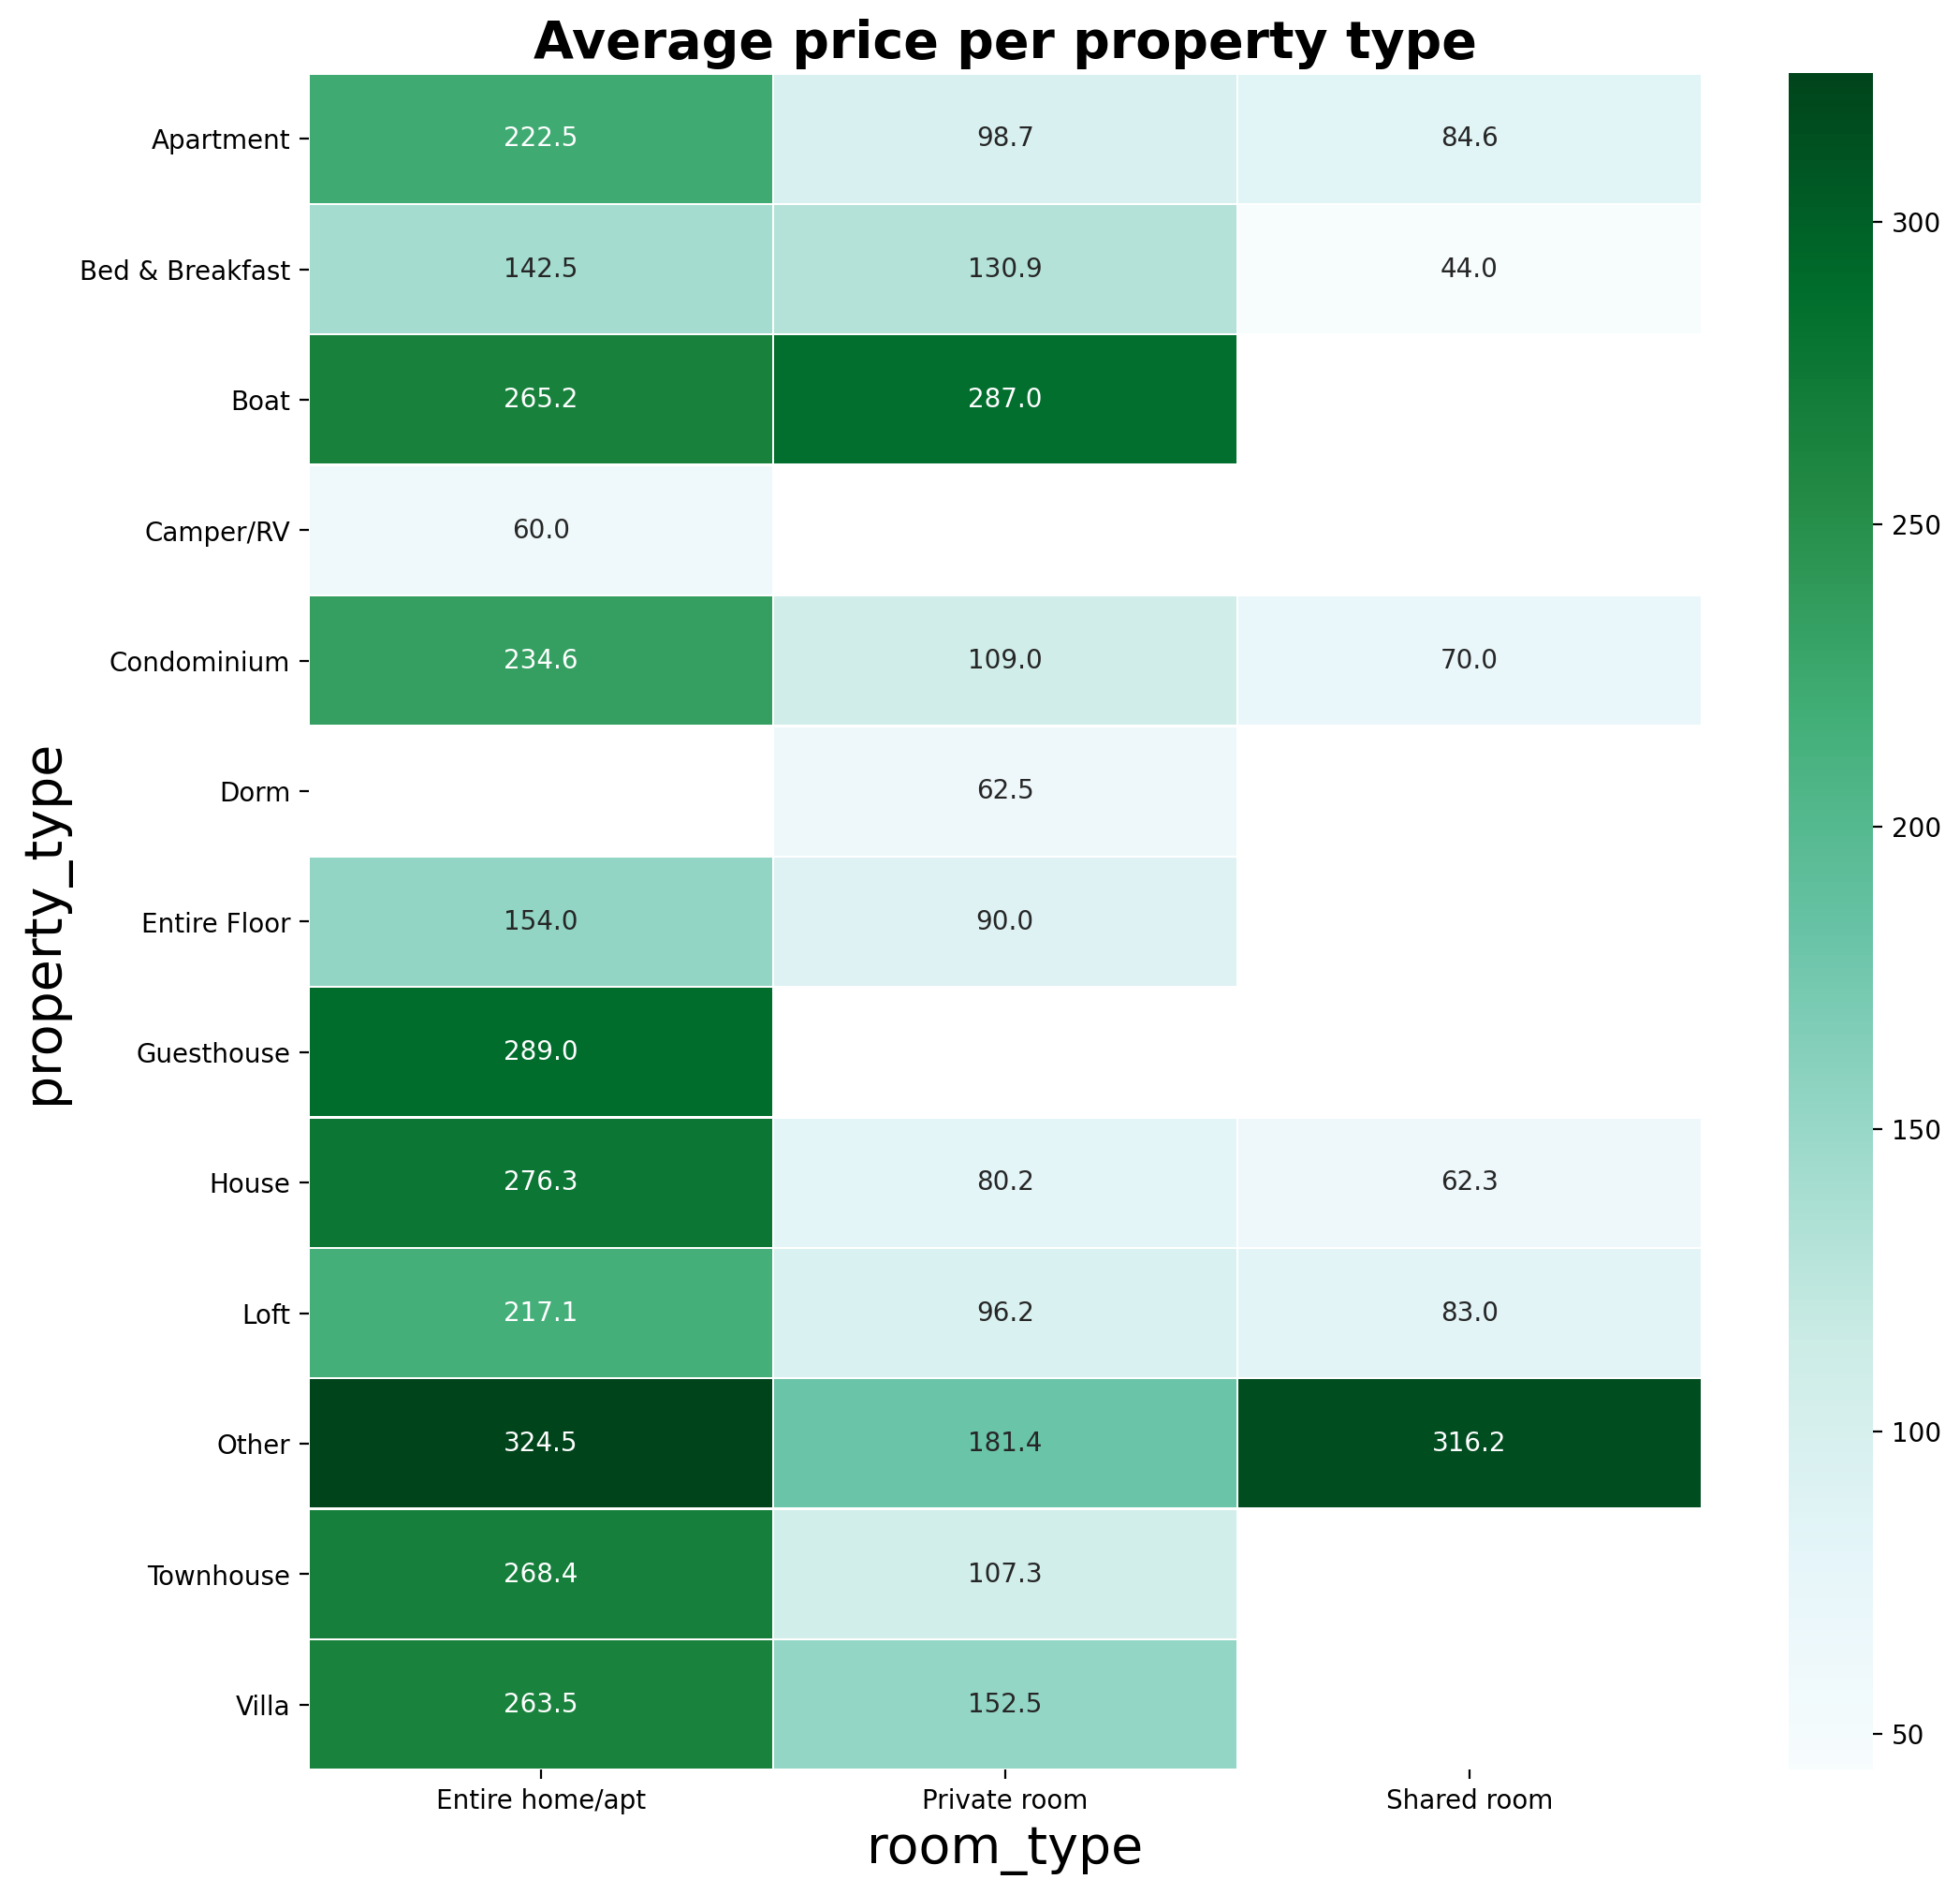

In [0]:
plt.figure(figsize=(12,12), dpi=200)
plt.title('Average price per property type', weight ='bold', size = 20);
plt.xlabel('room_type', size = 20)
plt.ylabel('property_type', size = 20)
sns.heatmap(listing_df.groupby(['property_type','room_type']).price.mean().unstack(), annot=True, fmt='.1f', linewidths= .5, cmap='BuGn');

# The above heatmap shows a general trend when the room type is Entire home/apt, price is generally higher while it is less in case of shared room

In [0]:
calendar_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [0]:
calendar_df['price']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1308885    NaN
1308886    NaN
1308887    NaN
1308888    NaN
1308889    NaN
Name: price, Length: 1308890, dtype: object

In [0]:
neighbourhood_cols = ['id', 'property_type', 'room_type', 'neighbourhood', 
                      'neighbourhood_cleansed','zipcode', 'price']

neighbourhood_listings = listing_df[neighbourhood_cols]
neighbourhood_listings.tail()

,id,property_type,room_type,neighbourhood,neighbourhood_cleansed,zipcode,price
3580,8373729,Apartment,Private room,Somerville,Charlestown,02143,69.0
3581,14844274,Apartment,Private room,NaN,Allston,02446,150.0
3582,14585486,Apartment,Entire home/apt,NaN,Charlestown,02141,198.0
3583,14603878,Apartment,Private room,Somerville,Charlestown,02145,65.0
3584,14504422,Apartment,Private room,Somerville,Charlestown,02145,65.0


In [0]:
listing_df['neighbourhood_cleansed'].head()

0    Roslindale
1    Roslindale
2    Roslindale
3    Roslindale
4    Roslindale
Name: neighbourhood_cleansed, dtype: object

In [0]:
listing_df.groupby(['neighbourhood_cleansed']).mean()['price'].sort_values(ascending=False)

neighbourhood_cleansed
South Boston Waterfront    306.060241
Bay Village                266.833333
Leather District           253.600000
Back Bay                   240.950331
Downtown                   236.459302
Chinatown                  232.352113
Beacon Hill                224.443299
Fenway                     220.393103
West End                   209.591837
South End                  204.349693
Charlestown                198.045045
North End                  195.678322
South Boston               187.609195
Roxbury                    146.333333
Jamaica Plain              138.478134
Longwood Medical Area      138.444444
Mission Hill               121.967742
East Boston                119.153333
Brighton                   118.767568
Allston                    112.307692
West Roxbury               107.108696
Roslindale                  98.428571
Dorchester                  91.639405
Hyde Park                   86.548387
Mattapan                    75.125000
Name: price, dtype: float64

# Q3. Which room types in each neighbourhood have high prices?

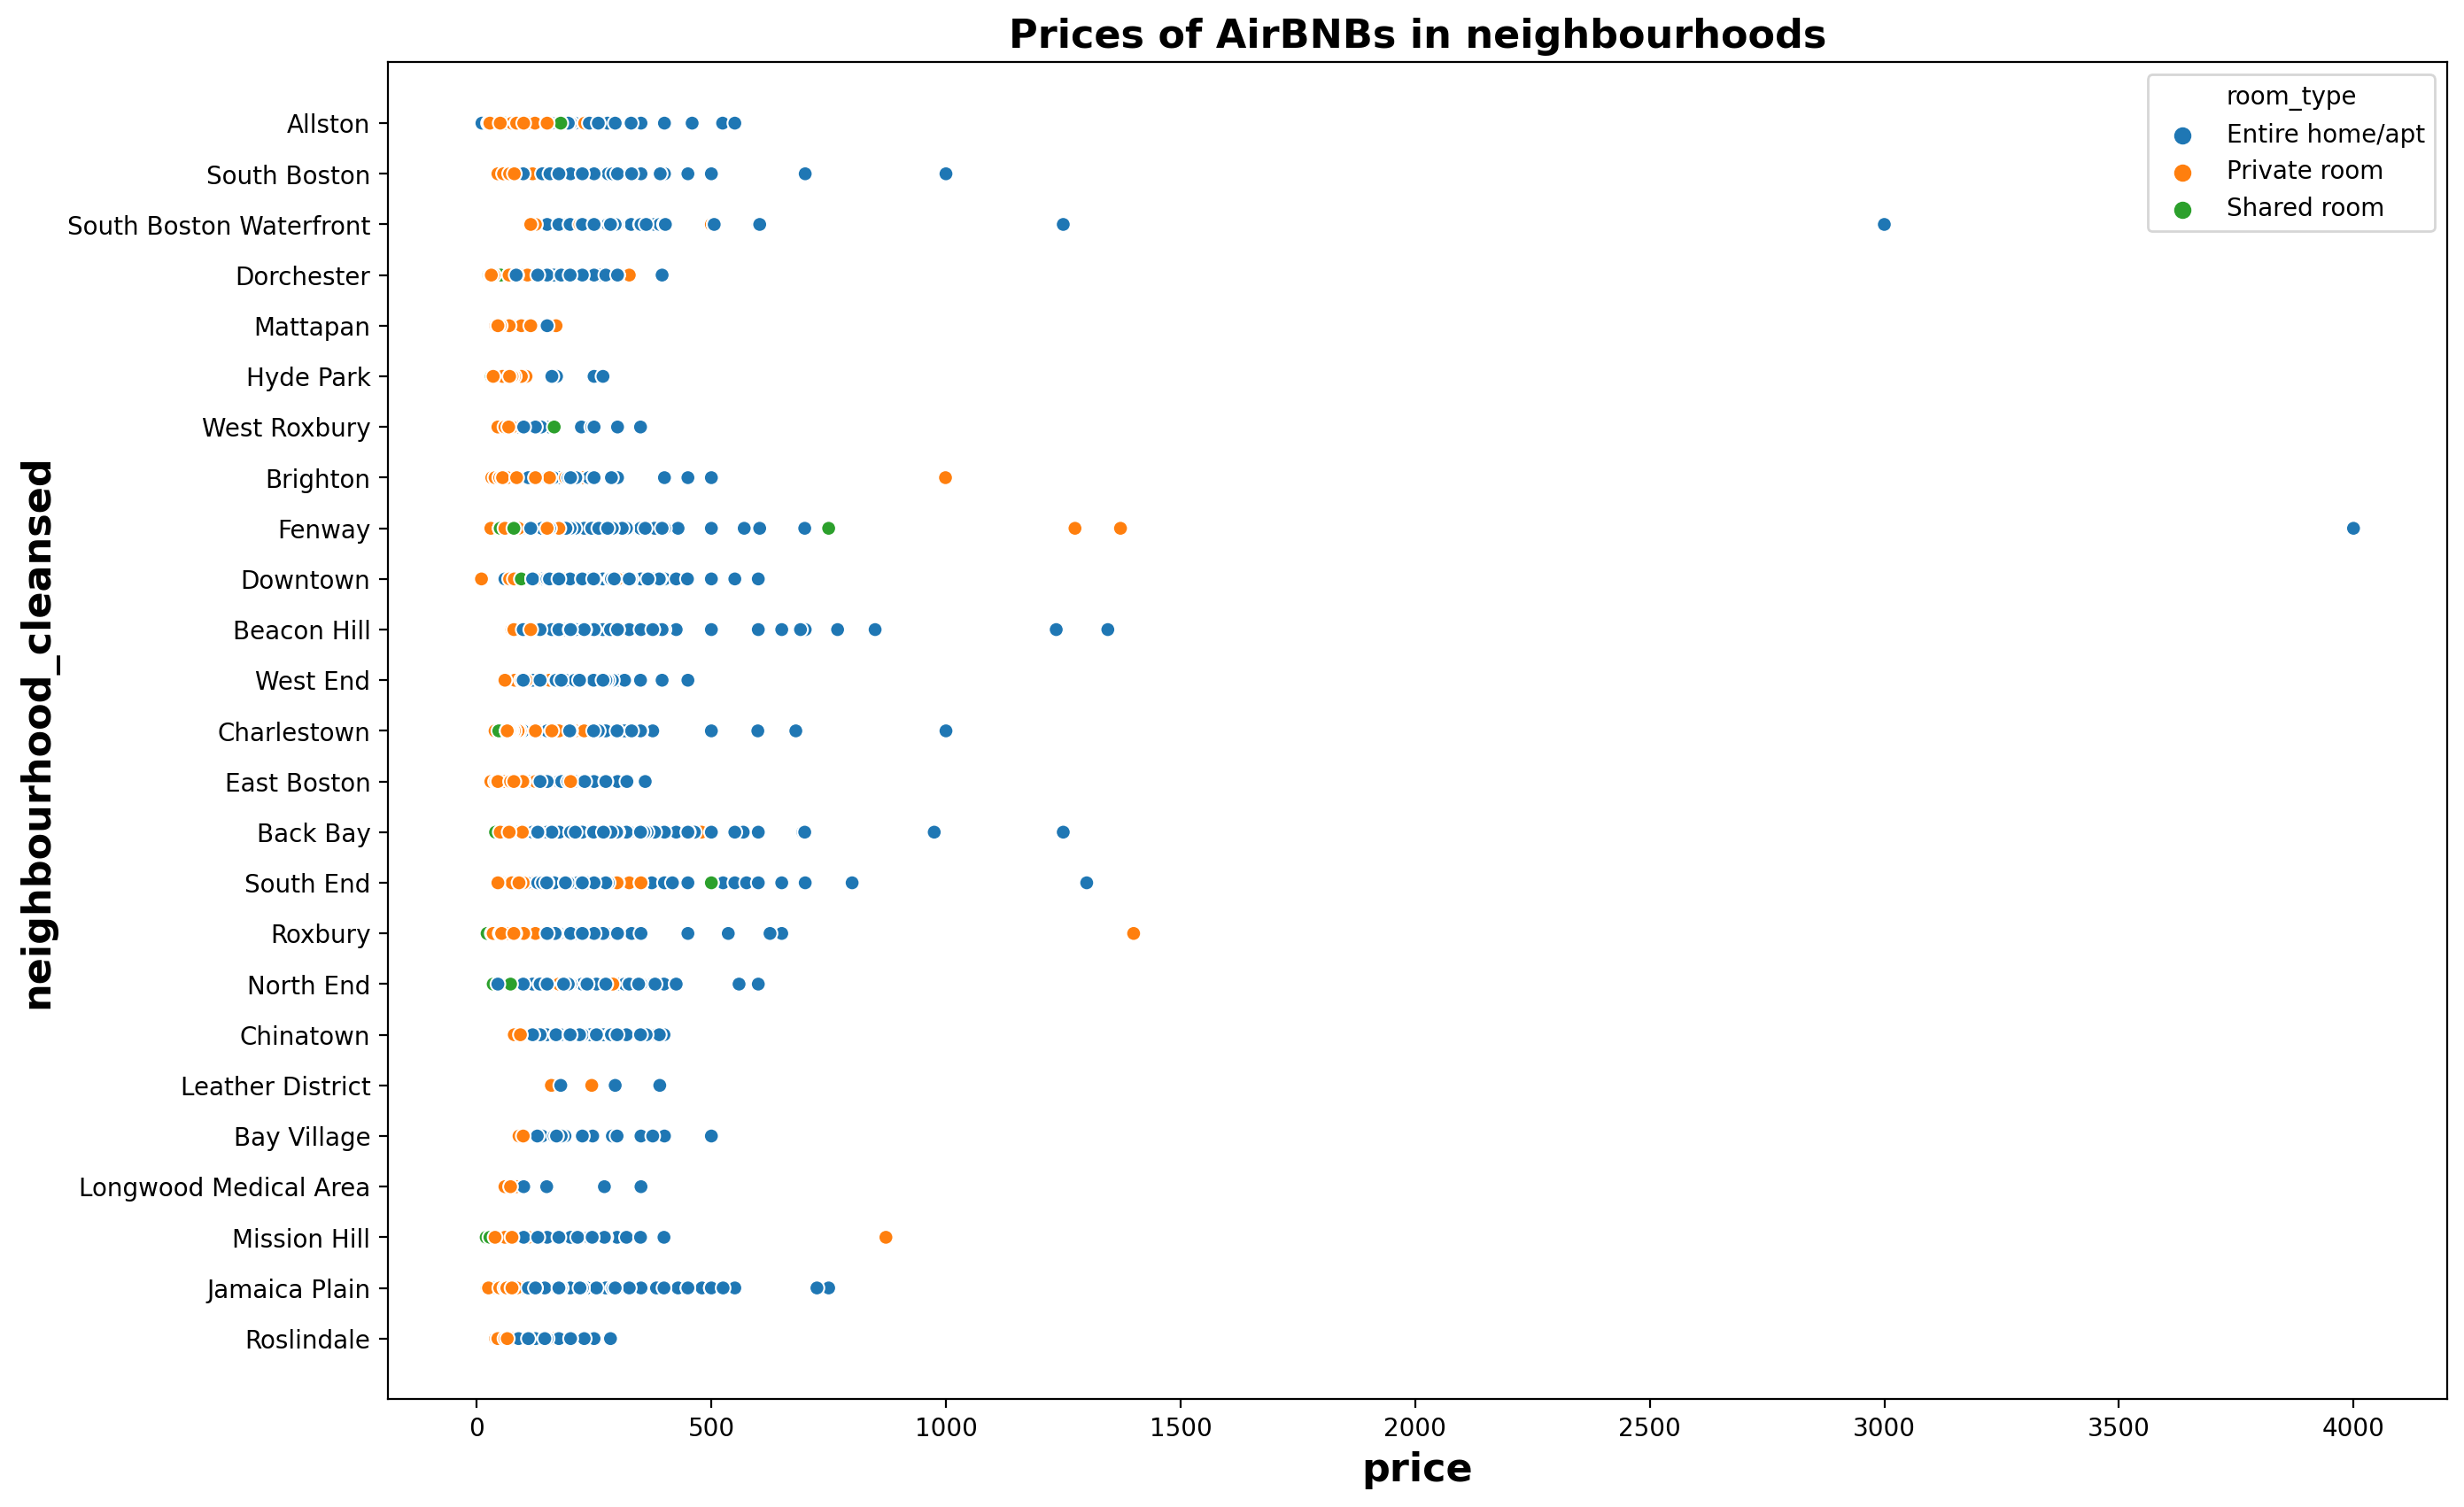

In [0]:
plt.figure(figsize=(15, 10), dpi=200)
plt.title('Prices of AirBNBs in neighbourhoods', size = 16, weight = 'bold');
plt.ylabel('Neighbourhoods', size = 16, weight = 'bold');
plt.xlabel('Price (USD)', size = 16, weight = 'bold');
base_color = sns.color_palette()[0]
sns.scatterplot(x='price', y='neighbourhood_cleansed',hue='room_type',data=listing_df)

# Average prices for each neighbourhood

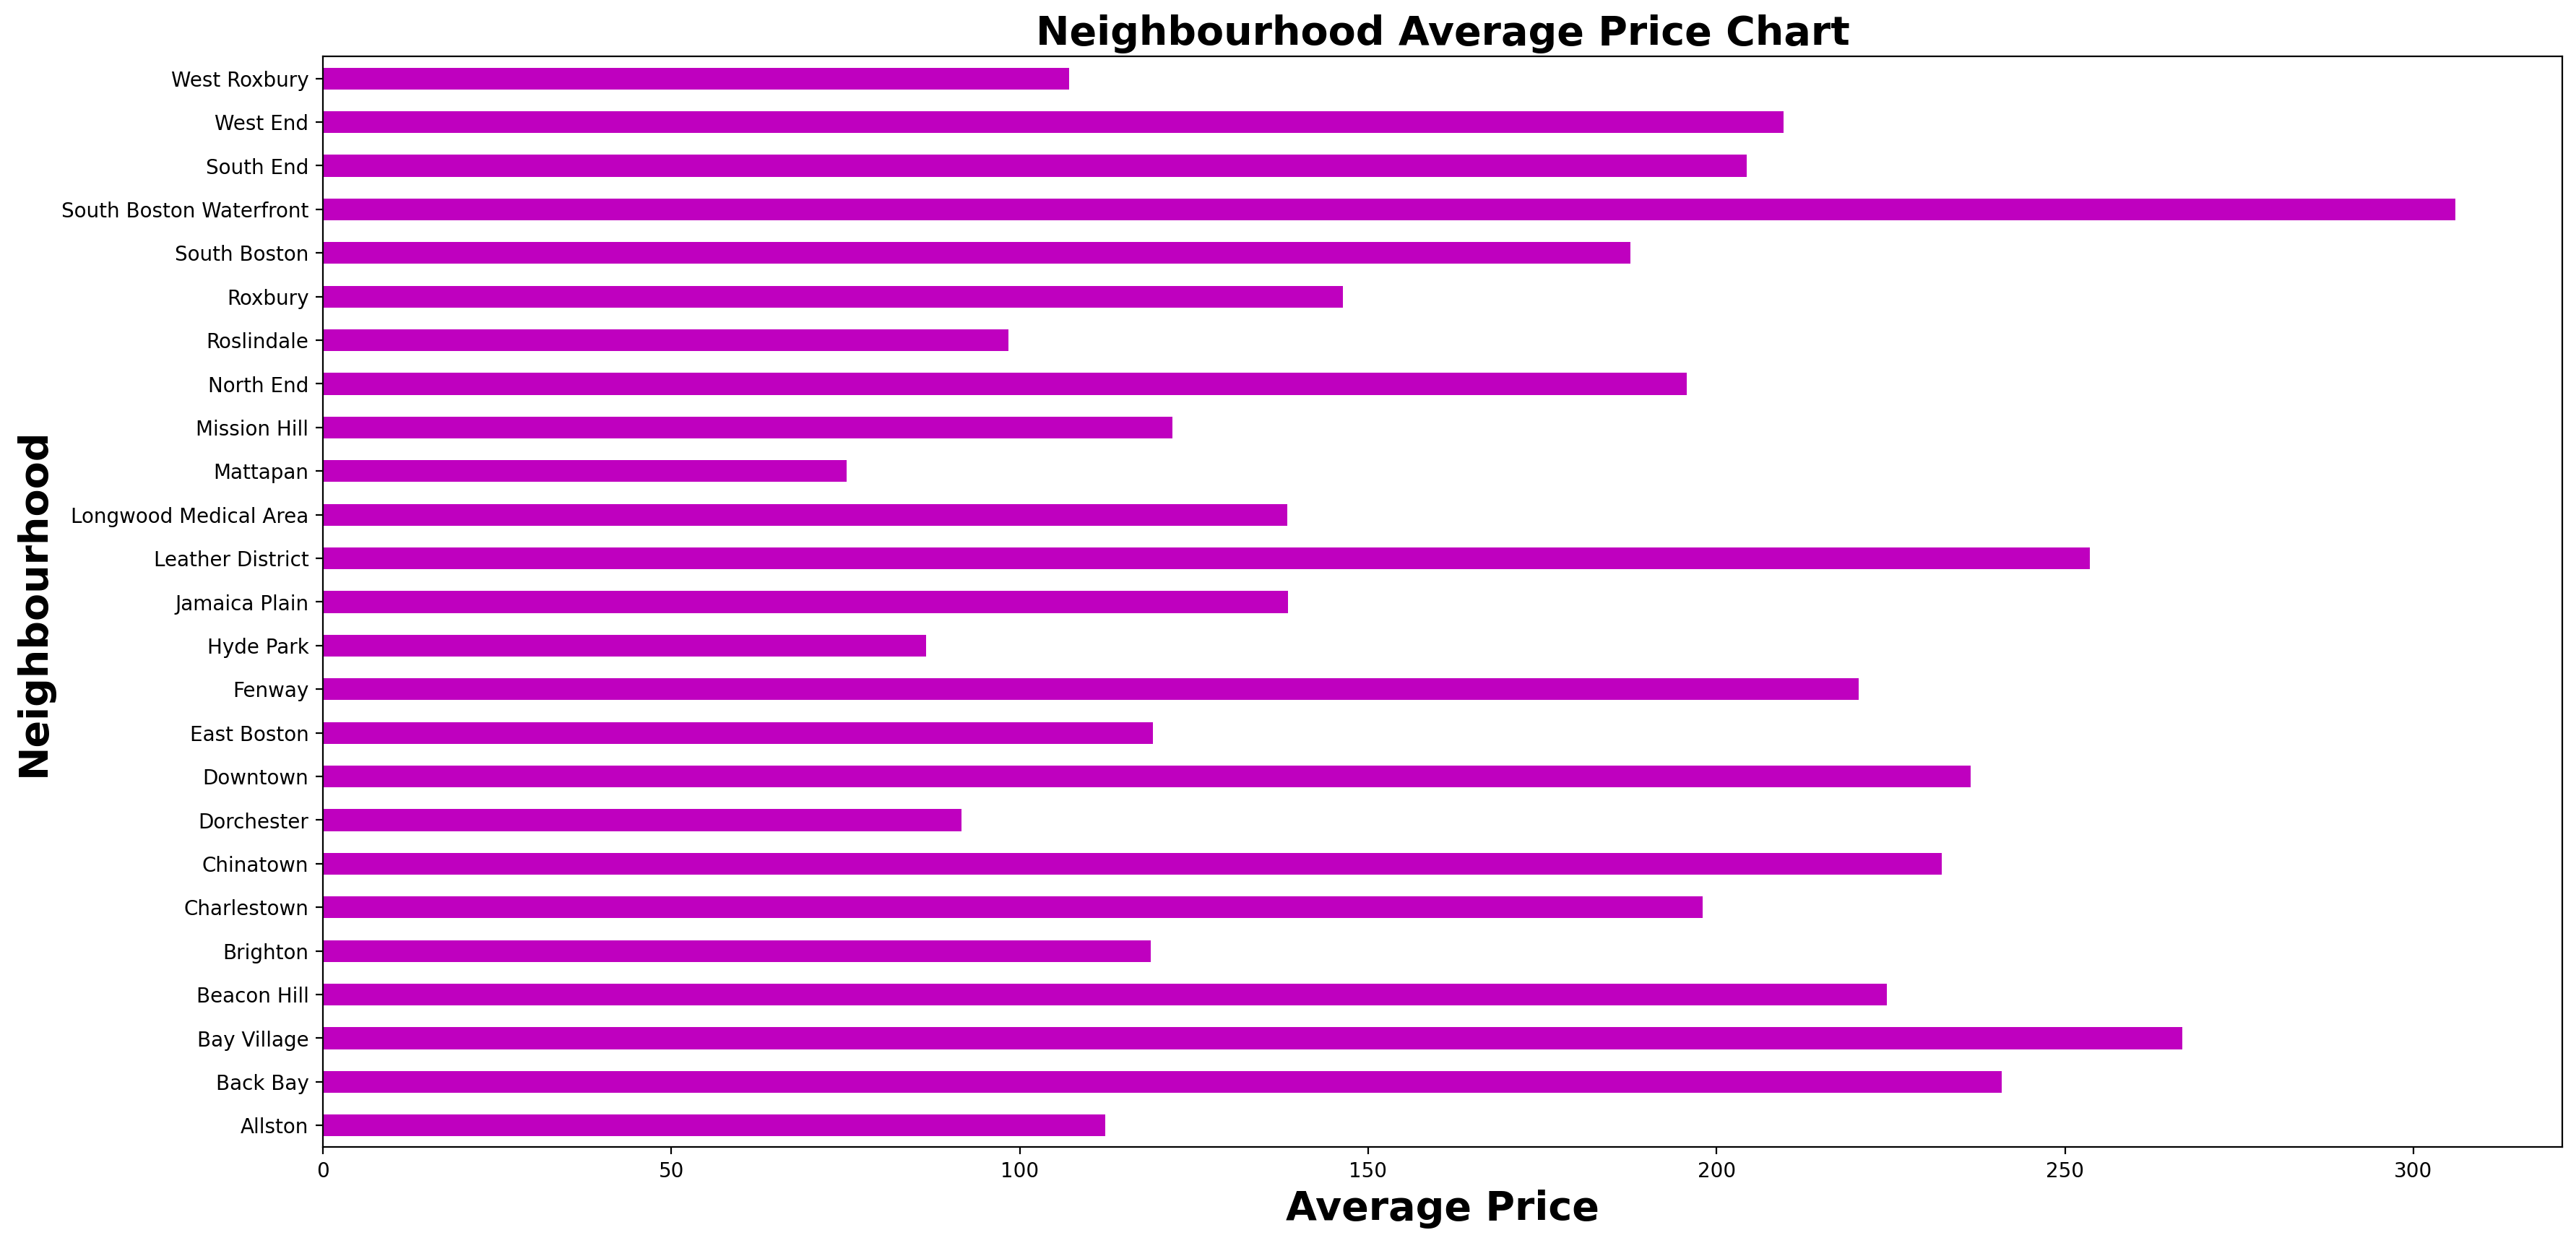

In [0]:
price_per_neighbourhood = listing_df.groupby(['neighbourhood_cleansed']).price.mean()
plt.figure(figsize=(20,10), dpi=200);
price_per_neighbourhood.plot(kind='barh', color='m');
plt.xlabel('Average Price', weight='bold', size =20)
plt.ylabel('Neighbourhood', weight = 'bold', size =20)
plt.title('Neighbourhood Average Price Chart', weight ='bold', size = 20);

# Thus, we can conclude that South Boston Waterfront has the highest price amongst other neighbourhoods.

# Relation between price and superhost

In [0]:
listing_df['host_is_superhost'].value_counts()

f    3178
t     407
Name: host_is_superhost, dtype: int64

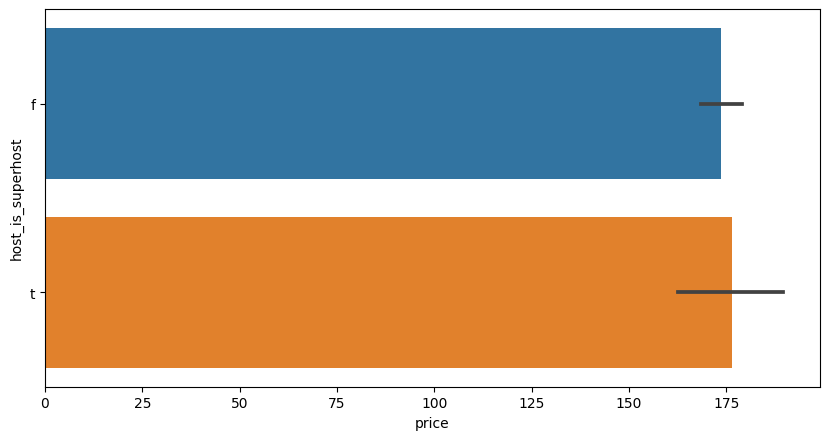

In [0]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)  
sns.barplot(x='price', y='host_is_superhost', data=listing_df)

# Q4. What are the top 5 amenities?

In [0]:
listing_df['room_type'].value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

In [0]:
listing_df.groupby(['price', 'beds','bed_type','amenities','square_feet','security_deposit', 'cleaning_fee']).head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,65.0,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3

In [0]:
listing_df    

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,65.0,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3

# Let us revisit our data to understand the features

In [0]:
listing_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,173.925802,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,148.331321,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,85.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,150.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,220.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,4000.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [0]:
listing_df['amenities'].head()

0    {TV,"Wireless Internet",Kitchen,"Free Parking ...
1    {TV,Internet,"Wireless Internet","Air Conditio...
2    {TV,"Cable TV","Wireless Internet","Air Condit...
3    {TV,Internet,"Wireless Internet","Air Conditio...
4    {Internet,"Wireless Internet","Air Conditionin...
Name: amenities, dtype: object

In [0]:
listing_df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 95, dtype: object

# Cleaning the amenities column

In [0]:
amenities = listing_df['amenities'].apply(lambda x: [a.replace('{', '').replace('}', '').replace('"', '') for a in x.split(',')])


In [0]:
amenities

0       [TV, Wireless Internet, Kitchen, Free Parking ...
1       [TV, Internet, Wireless Internet, Air Conditio...
2       [TV, Cable TV, Wireless Internet, Air Conditio...
3       [TV, Internet, Wireless Internet, Air Conditio...
4       [Internet, Wireless Internet, Air Conditioning...
                              ...                        
3580    [Internet, Wireless Internet, Air Conditioning...
3581    [TV, Internet, Wireless Internet, Air Conditio...
3582    [translation missing: en.hosting_amenity_49, t...
3583    [Kitchen, Gym, Family/Kid Friendly, Washer, Dr...
3584    [Wireless Internet, Kitchen, Essentials, trans...
Name: amenities, Length: 3585, dtype: object

In [0]:
mlb = MultiLabelBinarizer()
amenities_result = pd.DataFrame(mlb.fit_transform(amenities), index=amenities.index, columns=mlb.classes_)

In [0]:
amenities_count=amenities_result.sum().sort_values(ascending=False)

Text(0.5, 0, 'Occurence')

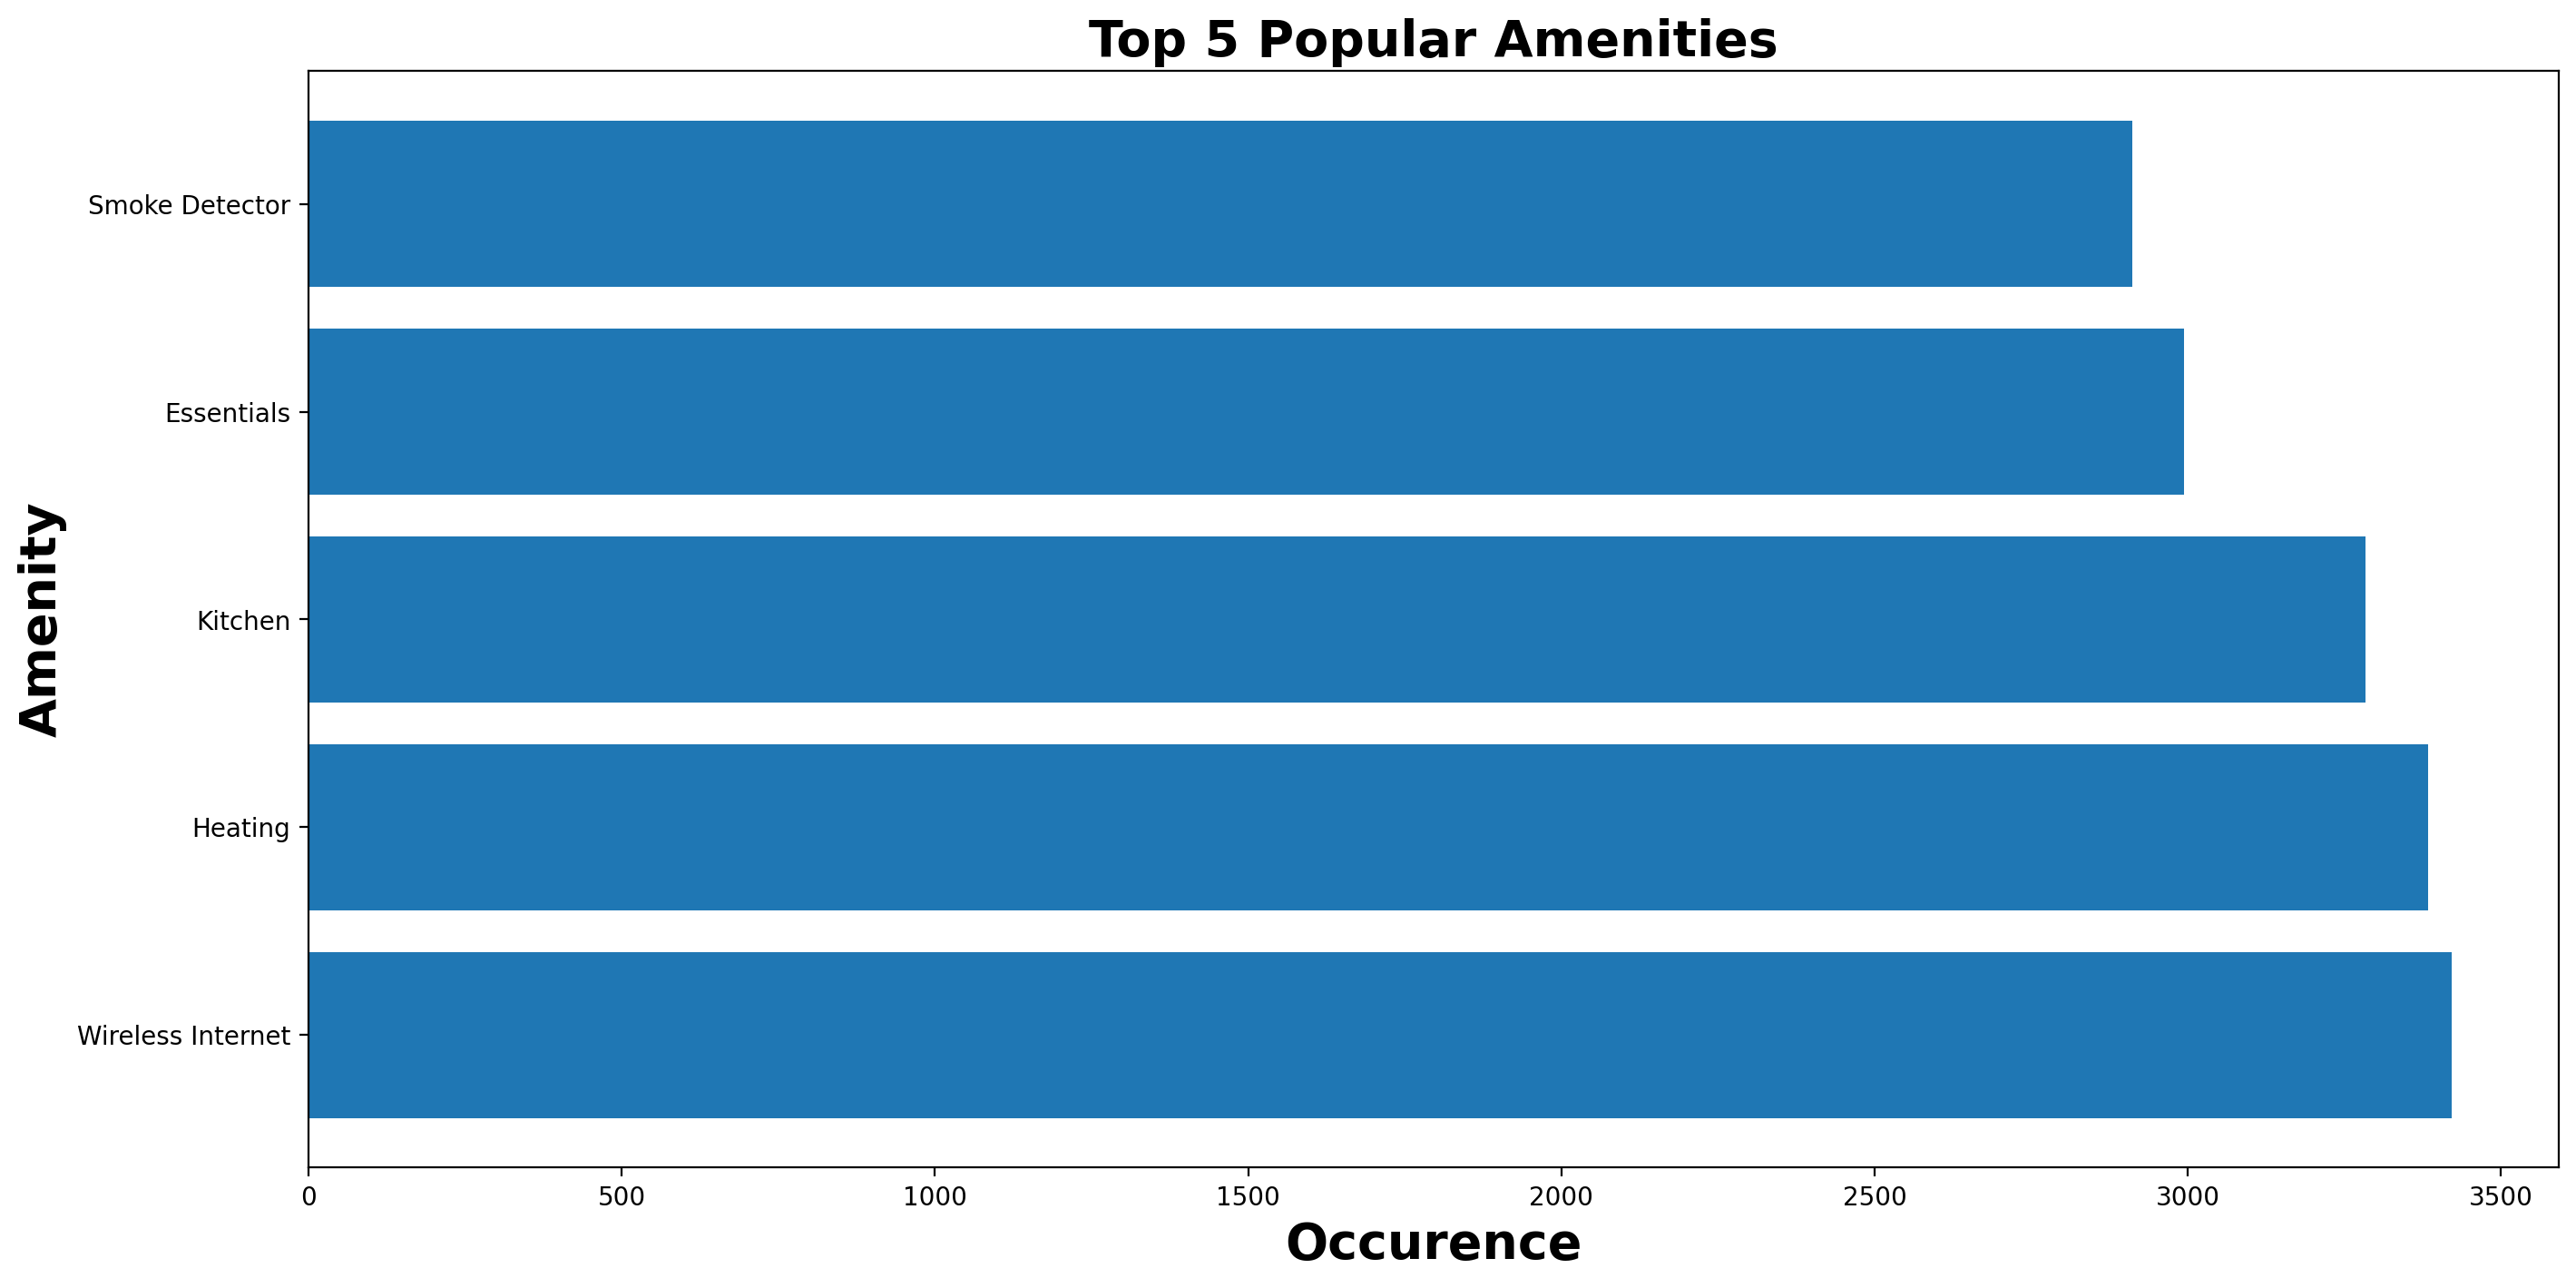

In [0]:
plt.figure(figsize=(16,8),dpi=200)
plt.barh(amenities_count[:5].index,amenities_count[:5].values)
plt.title('Top 5 Popular Amenities', weight='bold', size =20)
plt.ylabel('Amenity', weight='bold', size =20)
plt.xlabel('Occurence', weight='bold', size =20)

# The Top 5 amenities are in the following order:
Wireless Internet
Heating 
kitchen 
Essentials
Smoke detector

# So, in this way we have clearly used the Crisp Dm principles to perform the data analytics.